<a href="https://colab.research.google.com/github/Gopi138942/gcrportfolio.io/blob/main/diabetes_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully!
Shape of the dataset: (768, 9)
Columns in the dataset: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetespedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

=== Exploratory Data Analysis (EDA) ===

1. Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetespedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 

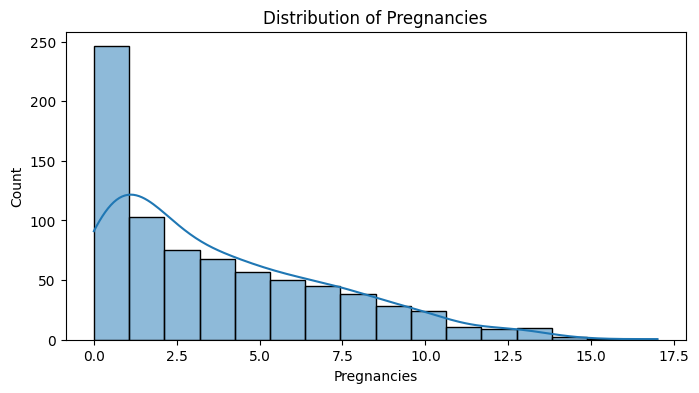

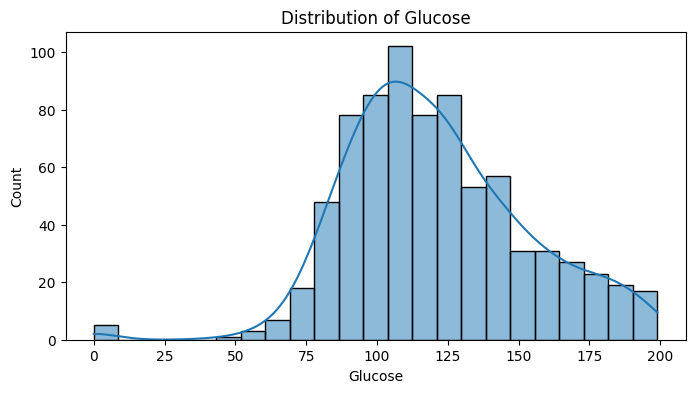

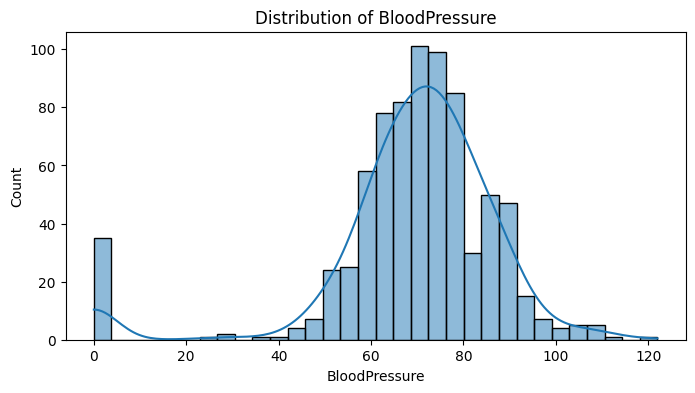

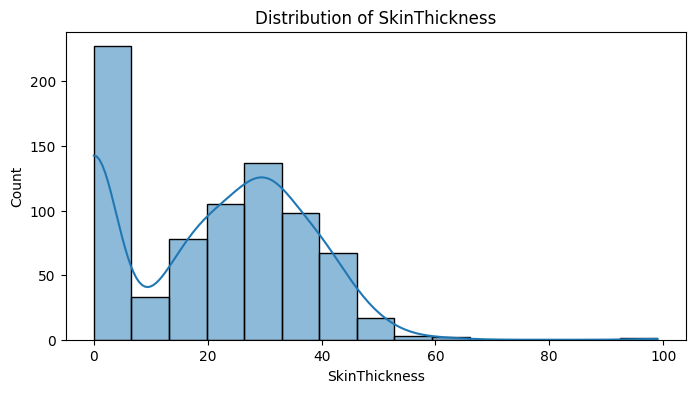

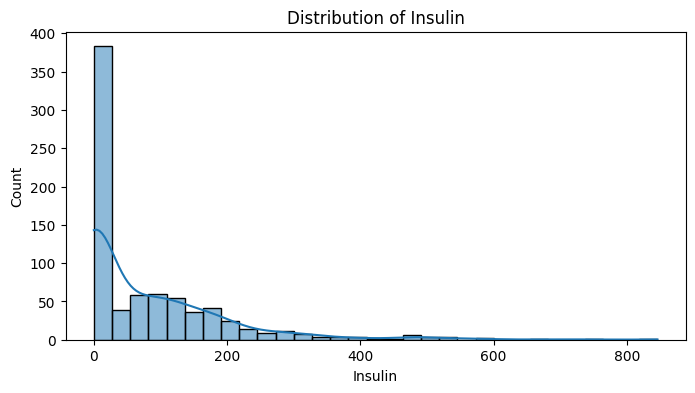

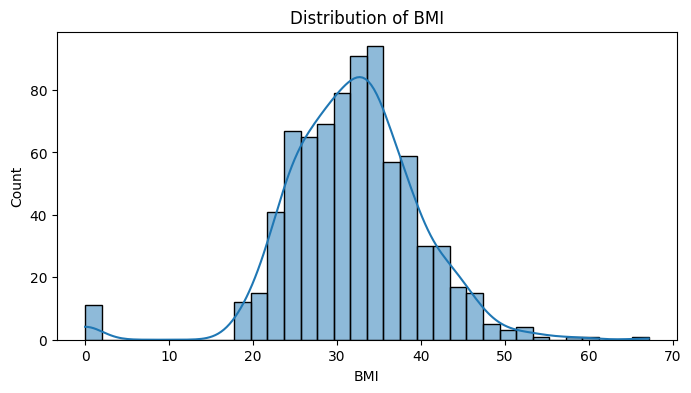

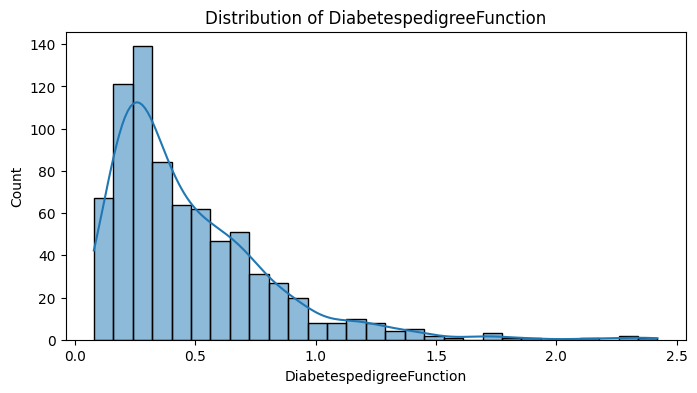

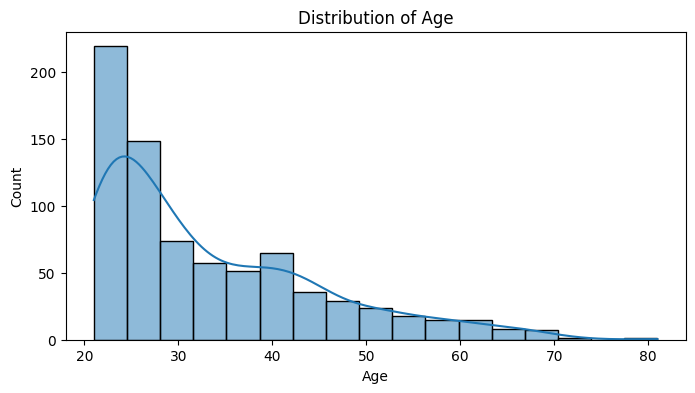

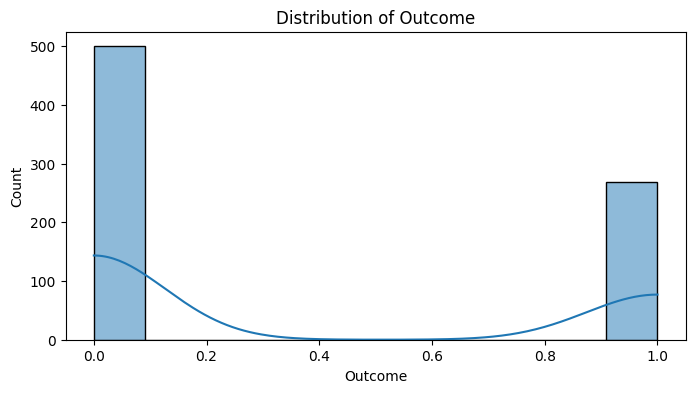


5. Correlation Heatmap:


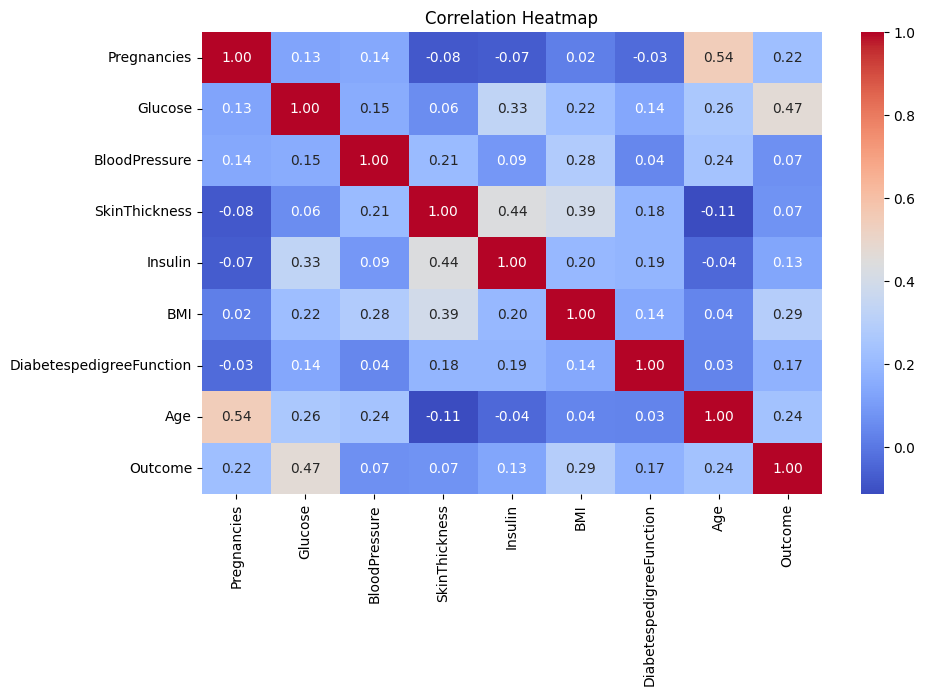


Training Random Forest...
Random Forest - Accuracy: 0.815, Precision: 0.7711864406779662, Recall: 0.900990099009901, F1 Score: 0.8310502283105022, ROC AUC: 0.8141314131413141

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.785, Precision: 0.7589285714285714, Recall: 0.8415841584158416, F1 Score: 0.7981220657276995, ROC AUC: 0.7844284428442844

Training Logistic Regression...
Logistic Regression - Accuracy: 0.74, Precision: 0.7378640776699029, Recall: 0.7524752475247525, F1 Score: 0.7450980392156863, ROC AUC: 0.7398739873987399

=== Final Results ===

Random Forest:
Accuracy: 0.815
Precision: 0.7711864406779662
Recall: 0.900990099009901
F1 Score: 0.8310502283105022
ROC AUC: 0.8141314131413141

Gradient Boosting:
Accuracy: 0.785
Precision: 0.7589285714285714
Recall: 0.8415841584158416
F1 Score: 0.7981220657276995
ROC AUC: 0.7844284428442844

Logistic Regression:
Accuracy: 0.74
Precision: 0.7378640776699029
Recall: 0.7524752475247525
F1 Score: 0.7450980392156863
ROC AUC: 0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

# Load dataset
def load_data(file_path):
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print(f"Shape of the dataset: {data.shape}")
    print(f"Columns in the dataset: {data.columns}")
    return data

# Exploratory Data Analysis (EDA)
def perform_eda(data):
    print("\n=== Exploratory Data Analysis (EDA) ===")

    # Display basic information
    print("\n1. Dataset Information:")
    print(data.info())

    # Summary statistics
    print("\n2. Summary Statistics:")
    print(data.describe())

    # Check for missing values
    print("\n3. Missing Values:")
    print(data.isnull().sum())

    # Visualize distributions of numerical features
    print("\n4. Visualizing Numerical Features:")
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

    # Visualize correlations
    print("\n5. Correlation Heatmap:")
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()

# Preprocess data
def preprocess_data(data, target_col):
    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

    # Separate features and target
    X = data.drop(target_col, axis=1)
    y = data[target_col]

    # Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)

    # Scale numerical features
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    return X, y

# Train and evaluate models
def train_and_evaluate(X, y):
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define models and hyperparameters for GridSearchCV
    models = {
        "Random Forest": {
            "model": RandomForestClassifier(random_state=42),
            "params": {
                'n_estimators': [100, 200],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5]
            }
        },
        "Gradient Boosting": {
            "model": GradientBoostingClassifier(random_state=42),
            "params": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5]
            }
        },
        "Logistic Regression": {
            "model": LogisticRegression(max_iter=1000, random_state=42),
            "params": {
                'C': [0.1, 1, 10],
                'penalty': ['l2']
            }
        }
    }

    # Train and evaluate models
    results = {}
    for name, config in models.items():
        print(f"\nTraining {name}...")
        grid_search = GridSearchCV(config["model"], config["params"], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        # Predict on test set
        y_pred = best_model.predict(X_test)

        # Evaluate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)

        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC AUC": roc_auc
        }

        print(f"{name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}, ROC AUC: {roc_auc}")

    return results

# Main function
def main(file_path, target_col):
    # Load data
    data = load_data(file_path)

    # Perform EDA
    perform_eda(data)

    # Preprocess data
    X, y = preprocess_data(data, target_col)

    # Train and evaluate models
    results = train_and_evaluate(X, y)

    # Print final results
    print("\n=== Final Results ===")
    for model_name, metrics in results.items():
        print(f"\n{model_name}:")
        for metric_name, value in metrics.items():
            print(f"{metric_name}: {value}")

# Run the script
if __name__ == "__main__":
    file_path = "/pima-indians-diabetes.csv"
    target_col = "Outcome"
    main(file_path, target_col)

Dataset loaded successfully!
Shape of the dataset: (768, 9)
Columns in the dataset: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetespedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

=== Exploratory Data Analysis (EDA) ===

1. Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetespedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 

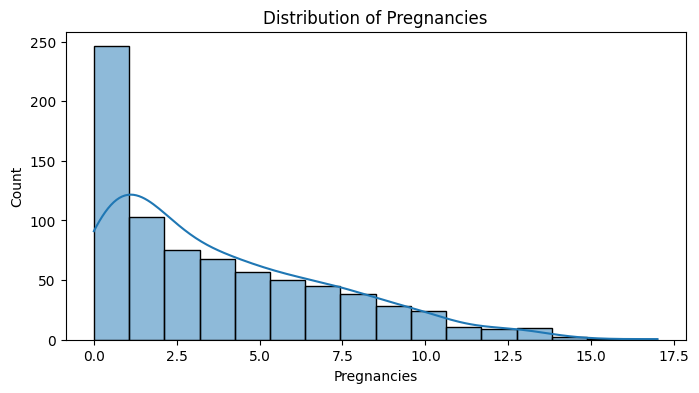

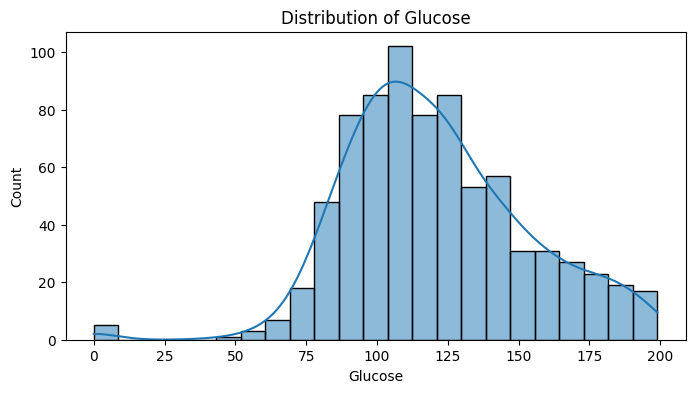

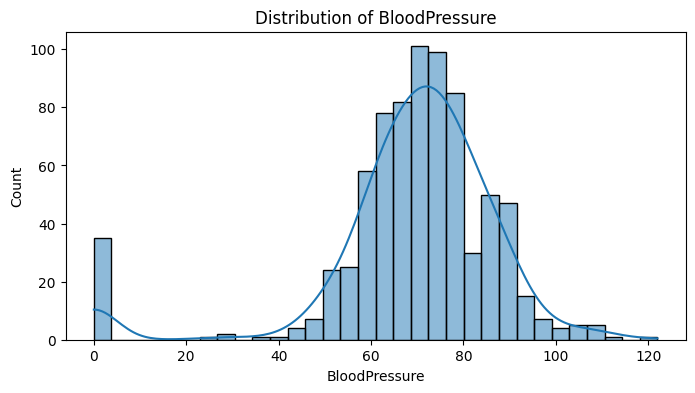

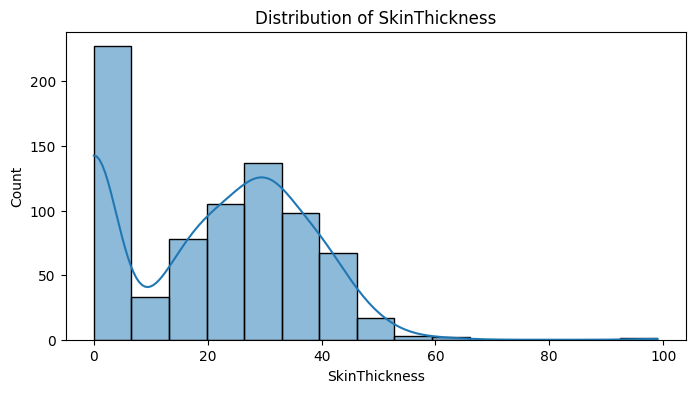

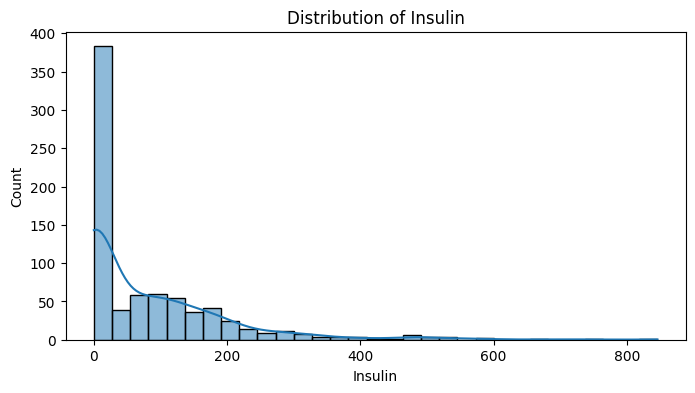

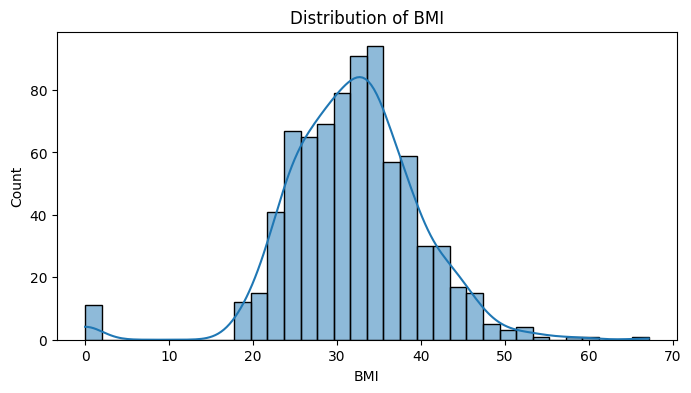

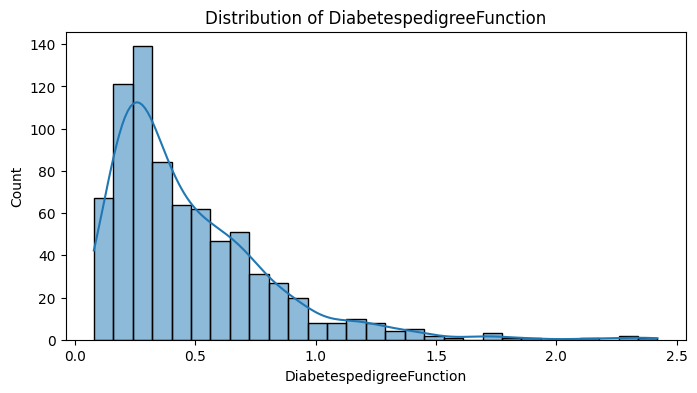

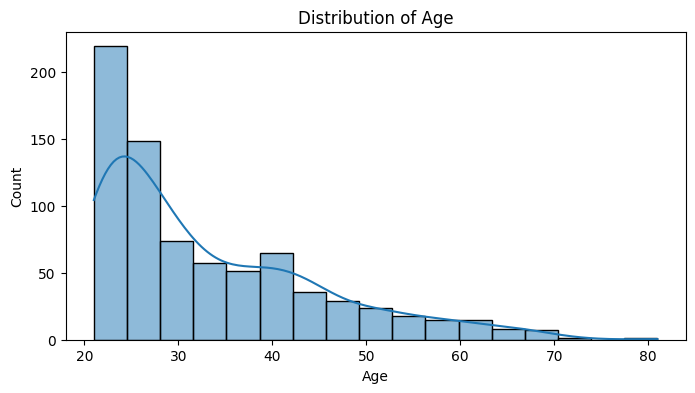

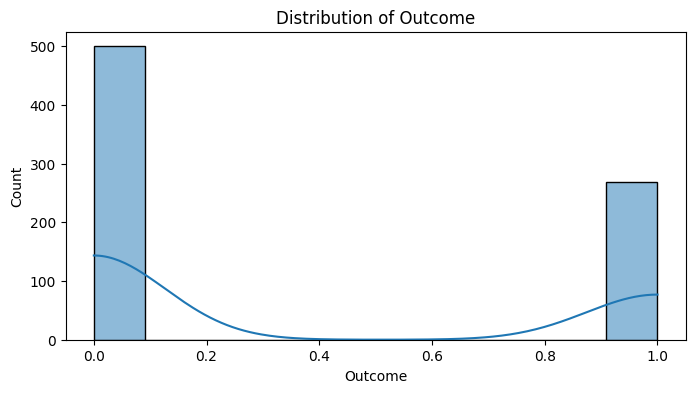


5. Correlation Heatmap:


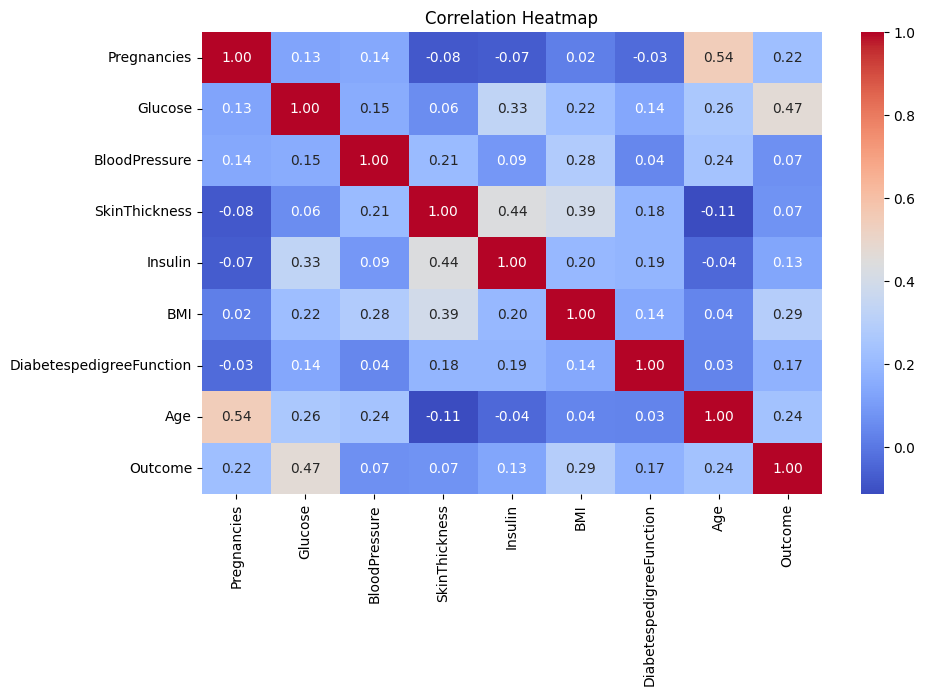


Training Random Forest...
Random Forest - Accuracy: 0.815, Precision: 0.7711864406779662, Recall: 0.900990099009901, F1 Score: 0.8310502283105022, ROC AUC: 0.8141314131413141

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.785, Precision: 0.7589285714285714, Recall: 0.8415841584158416, F1 Score: 0.7981220657276995, ROC AUC: 0.7844284428442844

Training Logistic Regression...
Logistic Regression - Accuracy: 0.74, Precision: 0.7378640776699029, Recall: 0.7524752475247525, F1 Score: 0.7450980392156863, ROC AUC: 0.7398739873987399

=== Final Results ===

Random Forest:
Accuracy: 0.815
Precision: 0.7711864406779662
Recall: 0.900990099009901
F1 Score: 0.8310502283105022
ROC AUC: 0.8141314131413141

Gradient Boosting:
Accuracy: 0.785
Precision: 0.7589285714285714
Recall: 0.8415841584158416
F1 Score: 0.7981220657276995
ROC AUC: 0.7844284428442844

Logistic Regression:
Accuracy: 0.74
Precision: 0.7378640776699029
Recall: 0.7524752475247525
F1 Score: 0.7450980392156863
ROC AUC: 0

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from joblib import dump

# Load dataset
def load_data(file_path):
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print(f"Shape of the dataset: {data.shape}")
    print(f"Columns in the dataset: {data.columns}")
    return data

# Exploratory Data Analysis (EDA)
def perform_eda(data):
    print("\n=== Exploratory Data Analysis (EDA) ===")

    # Display basic information
    print("\n1. Dataset Information:")
    print(data.info())

    # Summary statistics
    print("\n2. Summary Statistics:")
    print(data.describe())

    # Check for missing values
    print("\n3. Missing Values:")
    print(data.isnull().sum())

    # Visualize distributions of numerical features
    print("\n4. Visualizing Numerical Features:")
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

    # Visualize correlations
    print("\n5. Correlation Heatmap:")
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()

# Preprocess data
def preprocess_data(data, target_col):
    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

    # Separate features and target
    X = data.drop(target_col, axis=1)
    y = data[target_col]

    # Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)

    # Scale numerical features
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    return X, y

# Train and evaluate models
def train_and_evaluate(X, y):
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define models and hyperparameters for GridSearchCV
    models = {
        "Random Forest": {
            "model": RandomForestClassifier(random_state=42),
            "params": {
                'n_estimators': [100, 200],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5]
            }
        },
        "Gradient Boosting": {
            "model": GradientBoostingClassifier(random_state=42),
            "params": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5]
            }
        },
        "Logistic Regression": {
            "model": LogisticRegression(max_iter=1000, random_state=42),
            "params": {
                'C': [0.1, 1, 10],
                'penalty': ['l2']
            }
        }
    }

    # Train and evaluate models
    results = {}
    best_model = None
    best_score = 0
    for name, config in models.items():
        print(f"\nTraining {name}...")
        grid_search = GridSearchCV(config["model"], config["params"], cv=5, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        best_model_candidate = grid_search.best_estimator_

        # Predict on test set
        y_pred = best_model_candidate.predict(X_test)

        # Evaluate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)

        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC AUC": roc_auc
        }

        # Track the best model based on ROC AUC
        if roc_auc > best_score:
            best_score = roc_auc
            best_model = best_model_candidate

        print(f"{name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}, ROC AUC: {roc_auc}")

    return results, best_model

# Main function
def main(file_path, target_col):
    # Load data
    data = load_data(file_path)

    # Perform EDA
    perform_eda(data)

    # Preprocess data
    X, y = preprocess_data(data, target_col)

    # Train and evaluate models
    results, best_model = train_and_evaluate(X, y)

    # Print final results
    print("\n=== Final Results ===")
    for model_name, metrics in results.items():
        print(f"\n{model_name}:")
        for metric_name, value in metrics.items():
            print(f"{metric_name}: {value}")
    """
    # Save the best model
    dump(best_model, 'best_model.joblib')
    print("\nBest model saved as 'best_model.joblib'.")"""
    print(best_model)


# Run the script
if __name__ == "__main__":
    file_path = "/pima-indians-diabetes.csv"
    target_col = "Outcome"
    main(file_path, target_col)